In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [45]:
df = pd.read_csv('/Users/macbook/Documents/Fisayo/WSN-DS.csv')

In [46]:
df.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

# DATA PREPROCESSING

In [47]:
df.head(10)

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
5,101005,50,0,101010,31.91198,0,4,1,0,0,1,18,41,0,0,0.00000,3,0.06717,Normal
6,101006,50,0,101044,24.34167,0,4,1,0,0,1,5,38,0,0,0.00000,4,0.06214,Normal
7,101007,50,0,101010,26.75033,0,4,1,0,0,1,21,41,0,0,0.00000,3,0.06662,Normal
8,101008,50,0,101044,63.66485,0,4,1,0,0,1,17,38,0,0,0.00000,4,0.06649,Normal
9,101009,50,0,101000,32.90217,0,4,1,0,0,1,12,48,0,0,0.00000,1,0.07903,Normal


In [48]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df.drop('Attack type', axis=1)) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,0.827296,-0.172187
1,-0.391027,-0.292983


# KMEANS CLUSTERING

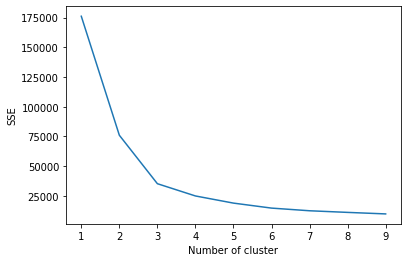

In [49]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [50]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(n_clusters=3)

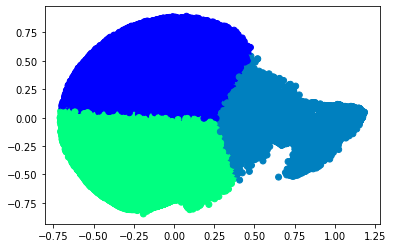

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374660 entries, 0 to 374659
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374660 non-null  int64  
 1    Time             374660 non-null  int64  
 2    Is_CH            374660 non-null  int64  
 3    who CH           374660 non-null  int64  
 4    Dist_To_CH       374660 non-null  float64
 5    ADV_S            374660 non-null  int64  
 6    ADV_R            374660 non-null  int64  
 7    JOIN_S           374660 non-null  int64  
 8    JOIN_R           374660 non-null  int64  
 9    SCH_S            374660 non-null  int64  
 10   SCH_R            374660 non-null  int64  
 11  Rank              374660 non-null  int64  
 12   DATA_S           374660 non-null  int64  
 13   DATA_R           374660 non-null  int64  
 14   Data_Sent_To_BS  374660 non-null  int64  
 15   dist_CH_To_BS    374660 non-null  float64
 16   send_code        37

In [ ]:
df.columns

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy',
       'Attack type'],
      dtype='object')

In [ ]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('(-----------------------------------------------------------------------------)')

 id
[ 101000  101001  101002 ... 1102080 1102093 1102094]
(-----------------------------------------------------------------------------)
 Time
[  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400
 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100
 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800
 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500
 3550 3600   53  103  153  203  253  303  353  403  453  503  553  603
  653  703  753  803  853  903  953 1003 1053 1103 1153 1203 1253 1303
 1353 1403 1453 1503 1553 1603 1653 1703 1753 1803 1853 1903 1953 2003
 2053 2103 2153 2203 2253 2303 2353 2403 2453 2503 2553 2603 2653 2703
 2753 2803 2853 2903 2953 3003 3053 3103 3153 3203 3253 3303 3353 3403
 3453 3503 3553  963 2820 3206 3040 1173 1121 1391  811 1177 1075 1181
  718 1276 1124 1269 1184  625 1122 1138  971 1031 1023  908 1069 1022
 137

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Attack type'] = le.fit_transform(df['Attack type'])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Attack type', axis=1)
y = df['Attack type']

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_train.head()

5525      3
295329    3
346228    3
312049    3
109710    3
Name: Attack type, dtype: int64

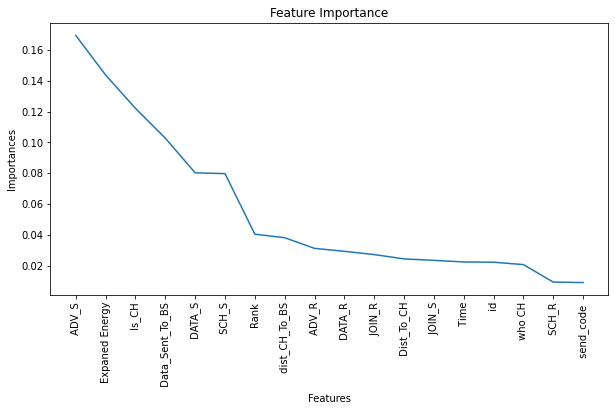

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# store the columns
cols = X_train.columns

# transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = cols)

rfc = RandomForestClassifier();

rfc.fit(X_train_scaled, y_train)

feat_imp = pd.DataFrame({'feature':X_train.columns,'importance':rfc.feature_importances_})
feat_imp = feat_imp.sort_values('importance',ascending=False).set_index('feature')

# plot feat_imp
plt.figure(figsize = (10, 5))
plt.title("Feature Importance")
plt.ylabel("Importances")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.plot(feat_imp)

# RANDOM FOREST CLASSIFIER

In [16]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf.fit(X_train, y_train)

# Make predictions
prediction_test = rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.9935541557678962


# MULTI LAYER PECEPTRON

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = df.drop('Attack type', axis=1)
y = df['Attack type']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=42)
mlp = MLPClassifier()

mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

mlp_score = accuracy_score(mlp_pred, y_test)
print('ACCURACY : '+str(mlp_score))

0.9063475630469596
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3347
           1       0.00      0.00      0.00      1130
           2       0.00      0.00      0.00      4877
           3       0.91      1.00      0.95    112059
           4       0.00      0.00      0.00      2225

    accuracy                           0.91    123638
   macro avg       0.18      0.20      0.19    123638
weighted avg       0.82      0.91      0.86    123638

[[     0      0      0   3347      0]
 [     0      0      0   1130      0]
 [     0      0      0   4877      0]
 [     0      0      0 112059      0]
 [     0      0      0   2225      0]]
ACCURACY : 0.9063475630469596


/Users/macbook/opt/anaconda3/envs/virtual/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/opt/anaconda3/envs/virtual/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbook/opt/anaconda3/envs/virtual/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print(accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print(plot_confusion_matrix(y_test, dt_pred))

0.9950905061550656


<AxesSubplot:>

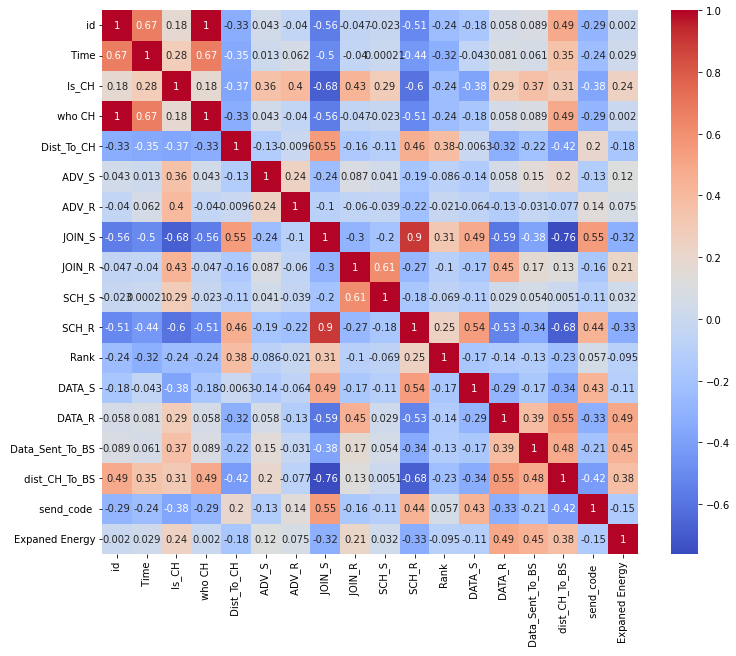

In [21]:
import seaborn as sns
train_data = df.drop('Attack type',axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

# COVARIANCE

In [22]:
np.cov(df[' ADV_S'],df[' Data_Sent_To_BS'])
print("Covariance between ADV_S and Data_Sent_To_BS: ",df[' ADV_S'].cov(df[' Data_Sent_To_BS']))
print("Covariance between ADV_S and Expaned Energy se: ",df[' ADV_S'].cov(df['Expaned Energy']))

Covariance between ADV_S and Data_Sent_To_BS:  6.076347512193401
Covariance between ADV_S and Expaned Energy se:  0.16441422908301861


# PEARSONS CORRELATION

In [39]:
p1 = df.loc[:,[" ADV_S","Expaned Energy"]].corr(method= "pearson")
p2 = df["Expaned Energy"].cov(df[" ADV_S"])/(df["Expaned Energy"].std()*df[" ADV_S"].std())
print('Pearson correlation: ')
print(p1)
print('--------------------------------------------')
print('Pearson correlation: ',p2)

Pearson correlation: 
                   ADV_S  Expaned Energy
 ADV_S          1.000000        0.119153
Expaned Energy  0.119153        1.000000
--------------------------------------------
Pearson correlation:  0.11915274430174855


# SPEARMANS CORRELATION

In [40]:
ranked_data = df.rank()
spearman_corr = ranked_data.loc[:,[" ADV_S","Expaned Energy"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
                  ADV_S  Expaned Energy
 ADV_S          1.00000        -0.04943
Expaned Energy -0.04943         1.00000


# MLP

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, mean_absolute_percentage_error
pred = mlp.predict(X_test)



In [30]:
explained_variance_score(y_test, mlp_pred)

-4.440892098500626e-16

In [31]:
mean_absolute_error(y_test, mlp_pred)

0.15693395234474838

In [32]:
mean_squared_error(y_test, mlp_pred)

0.3376389136026141

In [ ]:
mean_absolute_percentage_error(y_test,mlp)

365750366864775.8